In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

print( x_train.shape )

model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

print(model.summary())      # вывод структуры НС в консоль

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


his = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

#  loss func, accuracy
model.evaluate(x_test, y_test_cat)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

None
Kernels before training (first layer) - Numerical values for conv2d:
Filter 0, Channel 0:
[[-0.05359904  0.10933785 -0.06607849]
 [-0.11022007 -0.09594351  0.03871283]
 [-0.10784356  0.13246055 -0.05986063]]
Filter 1, Channel 0:
[[-0.10951732  0.02041885  0.02403203]
 [ 0.00022888  0.02591071  0.13015549]
 [ 0.14003094  0.12237968  0.06540009]]
Filter 2, Channel 0:
[[ 0.13172273  0.07156749  0.0641972 ]
 [ 0.09829715 -0.09501068 -0.0940083 ]
 [ 0.12714772 -0.06370489 -0.03243846]]
Filter 3, Channel 0:
[[-0.04178997 -0.11053444 -0.08711141]
 [-0.12762427  0.08749163  0.00976738]
 [-0.0038593   0.02232492 -0.05450325]]
Filter 4, Channel 0:
[[-0.12550703  0.08777802 -0.00051519]
 [ 0.02727823  0.08792438  0.03885727]
 [ 0.07945921 -0.03701033 -0.12390124]]
Filter 5, Channel 0:
[[ 0.01980332  0.00011285 -0.02140172]
 [-0.07718415 -0.02890967 -0.06251222]
 [-0.07509673 -0.04867236  0.06603619]]
Filter 6, Channel 0:
[[ 0.12003703 -0.03350879 -0.10757957]
 [-0.03607836 -0.06212173  0.048

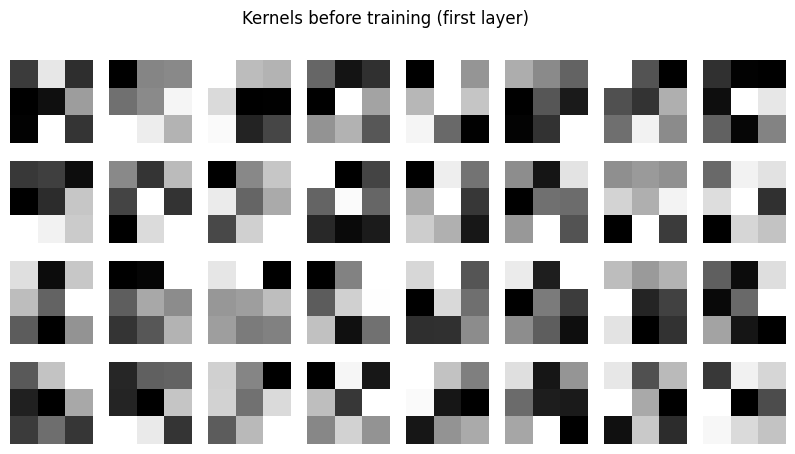

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.9091 - loss: 0.3037 - val_accuracy: 0.9842 - val_loss: 0.0529
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.9851 - loss: 0.0473 - val_accuracy: 0.9833 - val_loss: 0.0572
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 39ms/step - accuracy: 0.9910 - loss: 0.0288 - val_accuracy: 0.9877 - val_loss: 0.0424
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.9947 - loss: 0.0175 - val_accuracy: 0.9881 - val_loss: 0.0388
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 39ms/step - accuracy: 0.9946 - loss: 0.0153 - val_accuracy: 0.9912 - val_loss: 0.0320
Kernels after training (first layer) - Numerical values for conv2d:
Filter 0, Channel 0:
[[ 0.12292292  0.23074311 -0.01046381]
 [-0.2533219  -0.44452506 -0.16052134]
 [ 0.07177422  0.23006614  0.01076958]]
Filter 1, Channel 0:
[[-0.14208223  0.05562938  0.02269713]
 [ 0.00225155  0.04086141  0.09347074]
 [ 0.13060288  0.1415356   0.02189545]]

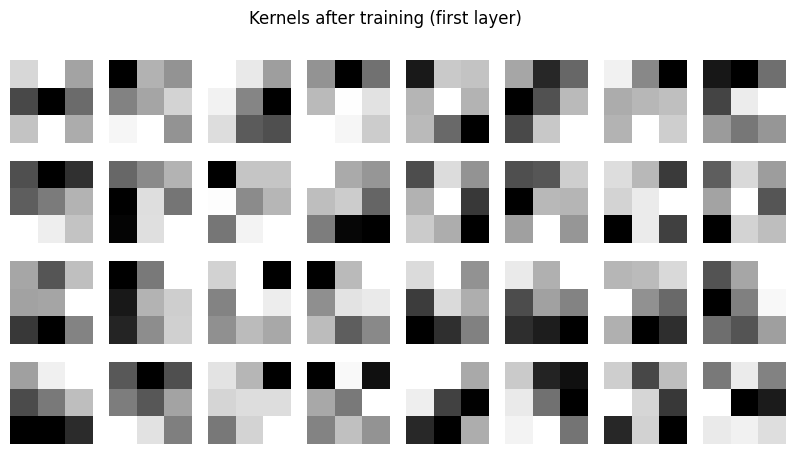

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9880 - loss: 0.0349
Manual convolution result shape: (26, 26)


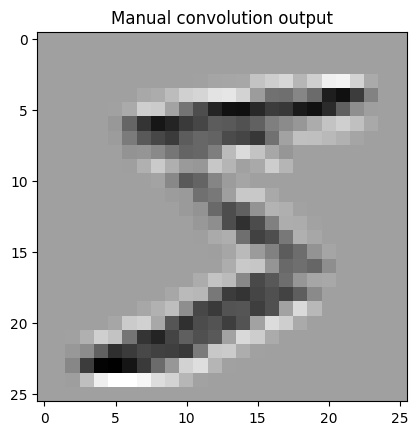

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

print(x_train.shape)

model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


def visualize_kernels(layer_name, title):
    layer = model.get_layer(layer_name)
    weights = layer.get_weights()[0]  # kernels
    print(f"{title} - Numerical values for {layer_name}:")
    for i in range(weights.shape[3]):  # for each filter
        for c in range(weights.shape[2]):  # for each channel
            print(f"Filter {i}, Channel {c}:")
            print(weights[:, :, c, i])


    fig, axs = plt.subplots(4, 8, figsize=(10, 5))
    for i in range(32):
        ax = axs[i//8, i%8]
        ax.imshow(weights[:, :, 0, i], cmap='gray')
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

visualize_kernels('conv2d', 'Kernels before training (first layer)')

his = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

visualize_kernels('conv2d', 'Kernels after training (first layer)')

model.evaluate(x_test, y_test_cat)


# output: карта признаков
def manual_convolution(image, kernel):
    # img
    h, w = image.shape
    # kernel
    kh, kw = kernel.shape
    # матрица для результата свертки (no padding)
    output = np.zeros((h - kh + 1, w - kw + 1))
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            # поэлементное умножение на ядро
            output[i, j] = np.sum(image[i:i+kh, j:j+kw] * kernel)
    return output


img = x_train[0, :, :, 0]
kernel = model.get_layer('conv2d').get_weights()[0][:, :, 0, 0]

result = manual_convolution(img, kernel)
print("Manual convolution result shape:", result.shape)
plt.imshow(result, cmap='gray')
# карта признаков к 1-му изображению обучающей выборки
plt.title('Manual convolution output')
plt.show()
